Import Libraries: Import essential libraries for data visualization (matplotlib.pyplot), numerical operations (numpy), data manipulation (pandas), machine learning metrics (accuracy_score, precision_score, recall_score, f1_score), data splitting (train_test_split), feature scaling (StandardScaler), Support Vector Machine (SVC), and label encoding (LabelEncoder).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

Load Dataset: Load the dataset from a CSV file into a Pandas DataFrame (df).

In [ ]:
# Load the dataset
df = pd.read_csv('/content/FastagFraudDetection.csv')

In [ ]:
df.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [ ]:
print("Missing values in 'FastagID':", df['FastagID'].isnull().sum())

Missing values in 'FastagID': 549


In [ ]:
df = df.dropna(subset=['FastagID'])

In [ ]:
# Select features 'Transaction_Amount' and 'Amount_paid'
selected_features = ['Transaction_Amount', 'Amount_paid']
X = df[selected_features]
y = df['Fraud_indicator']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Encode the output labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# SVM Model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train_encoded)

SVC(kernel='linear', random_state=42)

In [ ]:
# Predictions
y_pred = svm_model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)

In [ ]:
# Print accuracy metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 98.43%
Precision: 0.98
Recall: 1.00
F1 Score: 0.99


(0.0, 1.0)

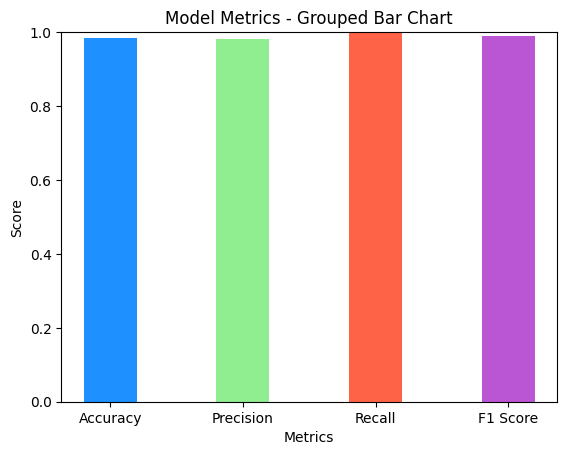

In [ ]:
#Grouped Bar Chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]
colors = ['dodgerblue', 'lightgreen', 'tomato', 'mediumorchid']

bar_width = 0.4
index = np.arange(len(metrics))

plt.bar(index, values, color=colors, width=bar_width)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Metrics - Grouped Bar Chart')
plt.xticks(index, metrics)
plt.ylim(0, 1)